In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import os
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder

# 1.Download the Dataset and Understand the Format (10 Points)

# 2.Generate the Data Matrix and the Label vector (10 Points)

In [126]:
path = os.path.abspath(os.curdir)
path

'C:\\Users\\SourcesNet'

In [127]:
x_features = []
y_labels = []

folder_path = path + '\\pca_lda_dataset'

def import_data(folder_path):
    for i in tqdm(os.listdir(folder_path)) :
        class_path = folder_path + '\\' + i
        for j in os.listdir(class_path) :
            img = plt.imread(os.path.join(class_path, j))
            x_features.append(img)
            y_labels.append(i)
    return x_features, y_labels
        
    
x_features, y_labels = import_data(folder_path)

100%|█████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 250.42it/s]


In [128]:
x_features[0]

array([[48, 49, 45, ..., 56, 56, 54],
       [45, 52, 39, ..., 52, 50, 51],
       [45, 50, 42, ..., 48, 53, 50],
       ...,
       [50, 48, 50, ..., 45, 46, 46],
       [45, 54, 49, ..., 46, 47, 47],
       [51, 51, 51, ..., 47, 46, 46]], dtype=uint8)

s1


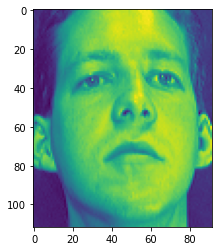

In [129]:
plt.imshow(x_features[9])
print(y_labels[9])

In [130]:
x_features[0].shape

(112, 92)

In [131]:
type(x_features[0])

numpy.ndarray

In [132]:
z = x_features[0].reshape(-1)
z

array([48, 49, 45, ..., 47, 46, 46], dtype=uint8)

### a.Convert every image into a vector of 10304 values corresponding to the image size.
### b.Stack the 400 vectorsinto a single Data Matrix D and generate the label vector y.The labels are integers from 1:40 corresponding to the subject id.

In [133]:
def flatten_images(x_features):
    for i in range(len(x_features)) :
        x_features[i] = x_features[i].reshape(-1) # we can use .ravel() also
    return x_features

x_features = flatten_images(x_features)

In [134]:
x_features[0].shape

(10304,)

In [135]:
len(x_features)

400

## 3.Split the Dataset into Training and Test sets (10 Points)
### a.From the Data Matrix D400x10304 keep the odd rows for training and the even rows for testing. 
### This will give you 5 instances per person for training and 5 instancesper person for testing.
### b.Split the labels vector accordingly.

In [136]:
def encode_labels(y_labels):
    le = LabelEncoder()
    y_label_coded = le.fit_transform(y_labels)
    return y_label_coded, le
    
y_label_coded, le = encode_labels(y_labels)
y_label_coded

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [137]:
def split_data_even_odd(x_features, y_label_coded):
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    for i in range(len(x_features)) :
        if i % 2 == 0 :
            x_train.append(x_features[i])
            y_train.append(y_label_coded[i])
        else :
            x_test.append(x_features[i])
            y_test.append(y_label_coded[i])
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = split_data_even_odd(x_features, y_label_coded)

In [138]:
len(x_train)
print(x_train[0] == x_features[0])
print(x_train[60] == x_features[120])
print(y_train[0] == y_label_coded[0])
print(y_train[60] == y_label_coded[120])

[ True  True  True ...  True  True  True]
[ True  True  True ...  True  True  True]
True
True


## 4.Classification using PCA(30 points)
### a.Use the pseudo code below for computing the projection matrix U. Define thealpha= {0.8,0.85,0.9,0.95}
### b.Project the training set, andtest sets separately using the same projection matrix.

In [139]:
def get_eigens(x_train): #must be numpy matrix
    #compute mean
    mean = x_train.mean(axis = 1)
    #center_data
    x_train_cen = x_train - mean
    #compute covariance
    cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
    #compute eigen vals and eigen vec
    eig_val, eig_vec = np.linalg.eigh(cov)
    return eig_val, eig_vec

In [140]:
def get_proj_mat(eig_val, eig_vec, alpha):
    #fraction of total variance
    fraction = []
    eig_sum=0
    eig_val_rev = eig_val[::-1]
    eig_vec_rev = eig_vec[::-1]

    for i in eig_val_rev :
        eig_sum += i
        fraction.append(eig_sum/eig_val_rev.sum())
    fraction = np.array(fraction)
    #choose dimensionality
    fraction_trimed = fraction > alpha
    smallest_ind = 0
    for i in range(len(fraction_trimed)) :
        if fraction_trimed[i] == True :
            smallest_ind = i
            break;
    #reduced basis
    proj_mat = eig_vec_rev[:smallest_ind+1]
    return proj_mat

In [141]:
def get_projected_mat(x_train, x_test, proj_mat):
    x_train_proj = np.dot(x_train, proj_mat.T)
    x_test_proj = np.dot(x_test, proj_mat.T)
    return x_train_proj, x_test_proj

### c.Use a simple classifier (first Nearest Neighbor to determine the class labels).
### d.Report Accuracy for every value of alpha separately.

In [142]:
def classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha, neighbors=1):
    knn = KNN(n_neighbors = neighbors)
    knn.fit(x_train_proj, y_train)
    y_pred = knn.predict(x_test_proj)
    print("accuracy of alpha",alpha,"and neighbours =", neighbors,"is", accuracy_score(y_pred, y_test))
    print("precision of alpha",alpha,"and neighbours =", neighbors,"is", precision_score(y_pred, y_test, average = 'weighted'))
    print("recall of alpha",alpha,"and neighbours =", neighbors,"is", recall_score(y_pred, y_test, average = 'weighted'))
    print("f1 score of alpha",alpha,"and neighbours =", neighbors,"is", f1_score(y_pred, y_test, average = 'weighted'))

In [143]:
x_train = np.matrix(x_train)
y_train = np.array(y_train).reshape(200,1)
y_test = np.array(y_test).reshape(200,1)
eig_val_eig_vac = get_eigens(x_train)

In [144]:
alphas = [0.8, 0.85, 0.9, 0.95]
for alpha in alphas:
    proj_mat = get_proj_mat(eig_val, eig_vec, alpha)
    x_train_proj, x_test_proj = get_projected_mat(x_train, x_test, proj_mat)
    classify_KNN(x_train_proj, y_train, x_test_proj, y_test, alpha)
    print("________________________________________________________")
    

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

accuracy of alpha 0.8 and neighbours = 1 is 0.705
precision of alpha 0.8 and neighbours = 1 is 0.76
recall of alpha 0.8 and neighbours = 1 is 0.705
f1 score of alpha 0.8 and neighbours = 1 is 0.7109758991008991
________________________________________________________
accuracy of alpha 0.85 and neighbours = 1 is 0.785
precision of alpha 0.85 and neighbours = 1 is 0.8340000000000001
recall of alpha 0.85 and neighbours = 1 is 0.785
f1 score of alpha 0.85 and neighbours = 1 is 0.7848490982701509
________________________________________________________
accuracy of alpha 0.9 and neighbours = 1 is 0.86
precision of alpha 0.9 and neighbours = 1 is 0.8959999999999999
recall of alpha 0.9 and neighbours = 1 is 0.86
f1 score of alpha 0.9 and neighbours = 1 is 0.8629725135975136
________________________________________________________
accuracy of alpha 0.95 and neighbours = 1 is 0.895
precision of alpha 0.95 and neighbours = 1 is 0.9279999999999999
recall of alpha 0.95 and neighbours = 1 is 0.895
f

C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:

### e.Can you find a relation between alpha and classification accuracy?

### From the results it's obvious that by increasing the alpha the accuracy of the model increases
#### This happens because the percentage of data loss from our data decrease so the accuracy of the model increases
#### i.e. when increasing the alpha the new dims (eigen vectors) become more and more representative for the data

# Draft

In [145]:
x_train = np.matrix(x_train)
y_train = np.matrix(y_train)
# compute the mean
mean1 = x_train[0].mean()
mean1

128.33821816770185

In [146]:
mean = x_train.mean(axis = 1)

In [147]:
x_train

matrix([[ 48,  49,  45, ...,  47,  46,  46],
        [ 60,  60,  62, ...,  32,  34,  34],
        [ 63,  53,  35, ...,  41,  10,  24],
        ...,
        [114, 110, 112, ...,  93,  89,  86],
        [113, 112, 111, ...,  87,  87,  89],
        [111, 114, 112, ...,  88,  86,  92]], dtype=uint8)

In [148]:
x_train_cen = x_train - mean
x_train_cen

matrix([[ -80.33821817,  -79.33821817,  -83.33821817, ...,  -81.33821817,
          -82.33821817,  -82.33821817],
        [ -87.98893634,  -87.98893634,  -85.98893634, ..., -115.98893634,
         -113.98893634, -113.98893634],
        [ -79.14926242,  -89.14926242, -107.14926242, ..., -101.14926242,
         -132.14926242, -118.14926242],
        ...,
        [  -0.15130047,   -4.15130047,   -2.15130047, ...,  -21.15130047,
          -25.15130047,  -28.15130047],
        [  -1.60461957,   -2.60461957,   -3.60461957, ...,  -27.60461957,
          -27.60461957,  -25.60461957],
        [  -5.30619177,   -2.30619177,   -4.30619177, ...,  -28.30619177,
          -30.30619177,  -24.30619177]])

In [149]:
cov = 1 / len(x_train_cen) * (np.dot(x_train_cen.T, x_train_cen))
cov

matrix([[1976.34805901, 1960.26574729, 1969.31129174, ..., 1037.08246264,
         1181.18927893, 1310.84550078],
        [1960.26574729, 1959.59343556, 1962.30398001, ..., 1057.75015092,
         1204.7469672 , 1326.33818906],
        [1969.31129174, 1962.30398001, 1979.05952446, ..., 1048.89569537,
         1203.27251165, 1330.21373351],
        ...,
        [1037.08246264, 1057.75015092, 1048.89569537, ..., 4275.79686627,
         3921.82368256, 3816.33490441],
        [1181.18927893, 1204.7469672 , 1203.27251165, ..., 3921.82368256,
         3962.76549884, 3880.1317207 ],
        [1310.84550078, 1326.33818906, 1330.21373351, ..., 3816.33490441,
         3880.1317207 , 3979.69794255]])

In [150]:
cov.shape

(10304, 10304)

In [151]:
eig_val, eig_vec = np.linalg.eigh(cov)
eig_val

array([-1.47865309e-09, -9.67008802e-10, -9.39322865e-10, ...,
        1.09462153e+06,  2.49586831e+06,  1.03243713e+07])

In [152]:
eig_vec

matrix([[ 4.40999566e-13,  0.00000000e+00,  0.00000000e+00, ...,
         -2.02077162e-02, -1.26709374e-02,  8.58581305e-03],
        [ 2.39118447e-01, -1.18850190e-01,  2.50816148e-01, ...,
         -2.01693608e-02, -1.26069511e-02,  8.63548751e-03],
        [-2.73098009e-01,  2.33758767e-01, -8.76188788e-02, ...,
         -2.03500603e-02, -1.28602767e-02,  8.54150292e-03],
        ...,
        [ 9.26977299e-03, -4.96540431e-03,  1.40951771e-02, ...,
          9.62853691e-03, -2.51121222e-03,  1.28744880e-02],
        [ 6.11347741e-03, -4.87901502e-05, -8.41145974e-04, ...,
          7.10166309e-03, -2.96597121e-03,  1.35954397e-02],
        [-1.43114475e-02, -2.73048956e-03, -9.79261541e-03, ...,
          6.10567764e-03, -4.77243340e-03,  1.41162794e-02]])

In [153]:
fraction = []
eig_sum=0
eig_val_rev = eig_val[::-1]
eig_vec_rev = eig_vec[::-1]

for i in eig_val_rev :
    eig_sum += i
    fraction.append(eig_sum/eig_val_rev.sum())

In [154]:
len(fraction)

10304

In [155]:
fraction[10303]

1.0000000000000007

In [156]:
fraction = np.array(fraction)
print(fraction)

[0.43845898 0.54445437 0.59094114 ... 1.         1.         1.        ]


In [157]:
alpha = [0.8, 0.85, 0.9, 0.95]

fraction_trimed = fraction > alpha[0]
fraction_trimed

array([False, False, False, ...,  True,  True,  True])

In [158]:
smallest_ind = 0

for i in range(len(fraction_trimed)) :
    if fraction_trimed[i] == True :
        smallest_ind = i
        break;

smallest_ind

18

In [159]:
proj_mat = eig_vec_rev[:smallest_ind+1]
proj_mat

matrix([[-1.43114475e-02, -2.73048956e-03, -9.79261541e-03, ...,
          6.10567764e-03, -4.77243340e-03,  1.41162794e-02],
        [ 6.11347741e-03, -4.87901502e-05, -8.41145974e-04, ...,
          7.10166309e-03, -2.96597121e-03,  1.35954397e-02],
        [ 9.26977299e-03, -4.96540431e-03,  1.40951771e-02, ...,
          9.62853691e-03, -2.51121222e-03,  1.28744880e-02],
        ...,
        [ 5.02321565e-03, -7.07822858e-03, -1.24872236e-03, ...,
          1.75339931e-02, -9.88204091e-03,  9.64316213e-03],
        [-3.49250542e-03, -9.80585753e-04,  6.38016881e-03, ...,
          1.79483112e-02, -8.50801606e-03,  9.31191296e-03],
        [ 4.26091060e-03, -2.86357337e-03, -5.19720200e-03, ...,
          1.34014312e-02, -7.67041412e-03,  9.26949872e-03]])

In [160]:
proj_mat.shape

(19, 10304)

In [161]:
x_train_proj = np.dot(x_train, proj_mat.T)
x_test_proj = np.dot(x_test, proj_mat.T)
x_train_proj.shape
x_test_proj.shape

(200, 19)

In [162]:
y_test = np.array(y_test)
y_train = y_train.reshape(200,1)
y_test = y_test.reshape(200,1)

In [163]:
knn = KNN(n_neighbors = 1)
knn.fit(x_train_proj, y_train)
y_pred = knn.predict(x_test_proj)
print("accuracy of alpha  = 0.8 and neighbours = 10 is", accuracy_score(y_pred, y_test))

accuracy of alpha  = 0.8 and neighbours = 10 is 0.705


C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\SourcesNet\anaconda3\lib\site-packages\sklearn\utils\validation.py: